# Zyfra
# Descripción del proyecto

Los datos se almacenan en tres archivos:

gold_recovery_train.csv — el dataset de entrenamiento descargado

gold_recovery_test.csv —el dataset de prueba descargado

gold_recovery_full.csv — el dataset fuente descargado

Los datos se indexan con la fecha y la hora de adquisición (date). Los parámetros cercanos en el tiempo suelen ser similares.

Algunos parámetros no están disponibles porque fueron medidos o calculados mucho más tarde. Por eso, algunas de las características que están presentes en el conjunto de entrenamiento pueden estar ausentes en el conjunto de prueba. El conjunto de prueba tampoco contiene objetivos.

El dataset fuente contiene los conjuntos de entrenamiento y prueba con todas las características.

Tienes a tu disposición los datos en bruto que solamente fueron descargados del almacén de datos. Antes de construir el modelo, comprueba que los datos sean correctos. Para ello, utiliza nuestras instrucciones.

# Instrucciones del proyecto

## 1. Prepara los datos

1.1. Abre los archivos y examina los datos.

Ruta de acceso a los archivos:

/datasets/gold_recovery_train.csv

/datasets/gold_recovery_test.csv

/datasets/gold_recovery_full.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer

In [2]:
train= pd.read_csv('/datasets/gold_recovery_train.csv')
test= pd.read_csv('/datasets/gold_recovery_test.csv')
full= pd.read_csv('/datasets/gold_recovery_full.csv')

1.2. Comprueba que el cálculo de la recuperación sea correcto. 

Calcula la recuperación de la característica rougher.output.recovery mediante el conjunto de 
entrenamiento.

Encuentra el EAM entre tus cálculos y los valores de la característica. 

Facilita los resultados.

In [3]:
recovery_train = train['rougher.output.recovery']

eam = np.mean(np.abs(recovery_train - train['rougher.output.recovery']))

In [4]:
print("Recuperación calculada en el conjunto de entrenamiento:")
print(recovery_train)
print("\nError Absoluto Medio (EAM):", eam)

Recuperación calculada en el conjunto de entrenamiento:
0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
16855    89.574376
16856    87.724007
16857    88.890579
16858    89.858126
16859    89.514960
Name: rougher.output.recovery, Length: 16860, dtype: float64

Error Absoluto Medio (EAM): 0.0


1.3. Analiza las características no disponibles en el conjunto de prueba. ¿Cuáles son estos parámetros? ¿Cuál es su tipo?

In [5]:
features_not_in_test = set(train.columns).difference(set(test.columns))

for feature in features_not_in_test:
    print(f"Característica: {feature}, Tipo: {train[feature].dtype}")


Característica: primary_cleaner.output.concentrate_sol, Tipo: float64
Característica: primary_cleaner.output.tail_sol, Tipo: float64
Característica: primary_cleaner.output.tail_ag, Tipo: float64
Característica: final.output.concentrate_pb, Tipo: float64
Característica: final.output.concentrate_ag, Tipo: float64
Característica: primary_cleaner.output.concentrate_pb, Tipo: float64
Característica: rougher.output.tail_sol, Tipo: float64
Característica: secondary_cleaner.output.tail_pb, Tipo: float64
Característica: final.output.concentrate_sol, Tipo: float64
Característica: rougher.output.tail_au, Tipo: float64
Característica: rougher.calculation.sulfate_to_au_concentrate, Tipo: float64
Característica: final.output.tail_ag, Tipo: float64
Característica: secondary_cleaner.output.tail_ag, Tipo: float64
Característica: rougher.output.tail_pb, Tipo: float64
Característica: rougher.output.tail_ag, Tipo: float64
Característica: primary_cleaner.output.tail_pb, Tipo: float64
Característica: roughe

1.4. Realiza el preprocesamiento de datos.

In [6]:
# calcular valores ausentes
print(train.isna().sum())
print(test.isna().sum())
print(full.isna().sum())

date                                            0
final.output.concentrate_ag                    72
final.output.concentrate_pb                    72
final.output.concentrate_sol                  370
final.output.concentrate_au                    71
                                             ... 
secondary_cleaner.state.floatbank5_a_level     85
secondary_cleaner.state.floatbank5_b_air       85
secondary_cleaner.state.floatbank5_b_level     84
secondary_cleaner.state.floatbank6_a_air      103
secondary_cleaner.state.floatbank6_a_level     85
Length: 87, dtype: int64
date                                            0
primary_cleaner.input.sulfate                 302
primary_cleaner.input.depressant              284
primary_cleaner.input.feed_size                 0
primary_cleaner.input.xanthate                166
primary_cleaner.state.floatbank8_a_air         16
primary_cleaner.state.floatbank8_a_level       16
primary_cleaner.state.floatbank8_b_air         16
primary_cleaner.state.flo

In [7]:
display(train.isna().head())
display(test.isna().head())
display(full.isna().head())

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
train_filled = train.fillna(train.mean())
test_filled = test.fillna(test.mean())
full_filled = full.fillna(full.mean())

In [9]:
train.isna().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype
---  ------                                              --------------  -----
 0   date                                                16860 non-null  bool 
 1   final.output.concentrate_ag                         16860 non-null  bool 
 2   final.output.concentrate_pb                         16860 non-null  bool 
 3   final.output.concentrate_sol                        16860 non-null  bool 
 4   final.output.concentrate_au                         16860 non-null  bool 
 5   final.output.recovery                               16860 non-null  bool 
 6   final.output.tail_ag                                16860 non-null  bool 
 7   final.output.tail_pb                                16860 non-null  bool 
 8   final.output.tail_sol                               16860 non-null  bool 
 9   final.output.tail

In [10]:
test.isna().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   date                                        5856 non-null   bool 
 1   primary_cleaner.input.sulfate               5856 non-null   bool 
 2   primary_cleaner.input.depressant            5856 non-null   bool 
 3   primary_cleaner.input.feed_size             5856 non-null   bool 
 4   primary_cleaner.input.xanthate              5856 non-null   bool 
 5   primary_cleaner.state.floatbank8_a_air      5856 non-null   bool 
 6   primary_cleaner.state.floatbank8_a_level    5856 non-null   bool 
 7   primary_cleaner.state.floatbank8_b_air      5856 non-null   bool 
 8   primary_cleaner.state.floatbank8_b_level    5856 non-null   bool 
 9   primary_cleaner.state.floatbank8_c_air      5856 non-null   bool 
 10  primary_cleaner.state.floatbank8_c_l

In [11]:
full.isna().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype
---  ------                                              --------------  -----
 0   date                                                22716 non-null  bool 
 1   final.output.concentrate_ag                         22716 non-null  bool 
 2   final.output.concentrate_pb                         22716 non-null  bool 
 3   final.output.concentrate_sol                        22716 non-null  bool 
 4   final.output.concentrate_au                         22716 non-null  bool 
 5   final.output.recovery                               22716 non-null  bool 
 6   final.output.tail_ag                                22716 non-null  bool 
 7   final.output.tail_pb                                22716 non-null  bool 
 8   final.output.tail_sol                               22716 non-null  bool 
 9   final.output.tail

In [12]:
train['date'] = pd.to_datetime(train['date'])
test['date'] = pd.to_datetime(test['date'])
full['date'] = pd.to_datetime(full['date'])

# 2. Analiza los datos

2.1. Observa cómo cambia la concentración de metales (Au, Ag, Pb) en función de la etapa de purificación.

In [13]:
metal_columns = ['rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_au',
                 'rougher.output.concentrate_ag', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_au',
                 'final.output.concentrate_ag', 'final.output.concentrate_pb', 'final.output.concentrate_au']

In [14]:
metal_concentrations_by_date = train.groupby('date')[metal_columns].mean()

print(metal_concentrations_by_date)

                     rougher.input.feed_ag  rougher.input.feed_pb  \
date                                                                
2016-01-15 00:00:00               6.100378               2.284912   
2016-01-15 01:00:00               6.161113               2.266033   
2016-01-15 02:00:00               6.116455               2.159622   
2016-01-15 03:00:00               6.043309               2.037807   
2016-01-15 04:00:00               6.060915               1.786875   
...                                    ...                    ...   
2018-08-18 06:59:59               6.091855               4.617558   
2018-08-18 07:59:59               6.121323               4.144989   
2018-08-18 08:59:59               5.970515               4.020002   
2018-08-18 09:59:59               6.048130               3.902537   
2018-08-18 10:59:59               6.158718               3.875727   

                     rougher.input.feed_au  rougher.output.concentrate_ag  \
date                     

2.2. Compara las distribuciones del tamaño de las partículas de la alimentación en el conjunto de entrenamiento y en el conjunto de prueba. Si las distribuciones varían significativamente, la evaluación del modelo no será correcta.

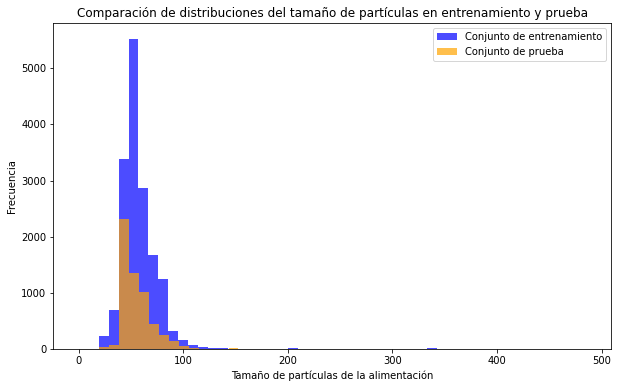

In [15]:
feed_size_train = train['rougher.input.feed_size']

feed_size_test = test['rougher.input.feed_size']

plt.figure(figsize=(10, 6))
plt.hist(feed_size_train, bins=50, alpha=0.7, label='Conjunto de entrenamiento', color='blue')
plt.hist(feed_size_test, bins=50, alpha=0.7, label='Conjunto de prueba', color='orange')
plt.xlabel('Tamaño de partículas de la alimentación')
plt.ylabel('Frecuencia')
plt.title('Comparación de distribuciones del tamaño de partículas en entrenamiento y prueba')
plt.legend()
plt.show()

Podemos ver que la frecuencia del conjunto de entrenamiento es mucho mayor que el conjunto de prueba en cualquiera de los tamaños de particulas en la alimentacion

2.3. Considera las concentraciones totales de **todas las sustancias en las diferentes etapas: materia prima, concentrado rougher y concentrado final.** ¿Observas algún valor anormal en la distribución total? Si es así, ¿merece la pena eliminar esos valores de ambas muestras? Describe los resultados y elimina las anomalías.

In [16]:
#concentraciones
train['total_feed'] = train.filter(like='input').sum(axis=1)
train['total_rougher'] = train.filter(like='output.concentrate_au').sum(axis=1) + \
                        train.filter(like='output.concentrate_ag').sum(axis=1) + \
                        train.filter(like='output.concentrate_pb').sum(axis=1)
train['total_final'] = train.filter(like='output.concentrate_au').sum(axis=1) + \
                       train.filter(like='output.concentrate_ag').sum(axis=1) + \
                       train.filter(like='output.concentrate_pb').sum(axis=1)


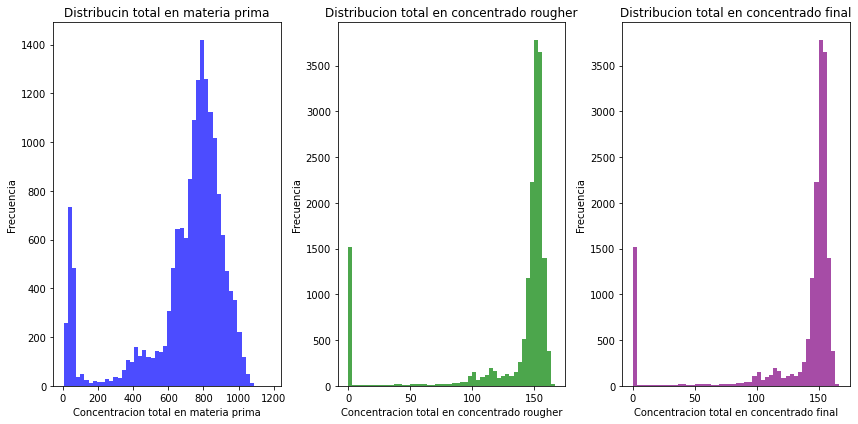

In [17]:
# Crear hist
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.hist(train['total_feed'], bins=50, color='blue', alpha=0.7)
plt.xlabel('Concentracion total en materia prima')
plt.ylabel('Frecuencia')
plt.title('Distribucin total en materia prima')

plt.subplot(1, 3, 2)
plt.hist(train['total_rougher'], bins=50, color='green', alpha=0.7)
plt.xlabel('Concentracion total en concentrado rougher')
plt.ylabel('Frecuencia')
plt.title('Distribucion total en concentrado rougher')

plt.subplot(1, 3, 3)
plt.hist(train['total_final'], bins=50, color='purple', alpha=0.7)
plt.xlabel('Concentracion total en concentrado final')
plt.ylabel('Frecuencia')
plt.title('Distribucion total en concentrado final')

plt.tight_layout()
plt.show()

Podemos ver que la forma de los valores son similares entre ellos, con la diferencia que la concentracion total en materia prima de la distribucion taotal en materia prima es mucho mayor a los demas pero su frecuencia es menor que la mitad

Por otra pate el concentrado rougher y el concentrado final pudiera decirse que tienen lo mismos valores

# 3. Construye el modelo

3.1. Escribe una función para calcular el valor final de sMAPE.

![Descripción de la imagen](https://practicum-content.s3.us-west-1.amazonaws.com/resources/moved_smape_1576239058_1589899769.jpg)

![Descripción de la imagen](https://practicum-content.s3.us-west-1.amazonaws.com/new-markets/DS_sprint_10/ES/moved_10.3.3ES.png)


In [18]:
def smape(y_true, y_pred):
    """
    Calcula el Symmetric Mean Absolute Percentage Error (sMAPE).
    
    Parameters:
        y_true (array-like): Array con los valores reales.
        y_pred (array-like): Array con las predicciones del modelo.

    Returns:
        float: Valor del sMAPE.
    """
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    absolute_error = np.abs(y_true - y_pred)

    denominator = np.abs(y_true) + np.abs(y_pred)

    smape = 2 * np.mean(absolute_error / denominator) * 100
    
    return smape


3.2. Entrena diferentes modelos. Evalúalos aplicando la validación cruzada. Elige el mejor modelo y pruébalo utilizando la muestra de prueba. Facilita los resultados.

In [19]:
train = train[train['rougher.output.recovery'] > 0.01]

In [20]:
X_train = train.drop(columns=['date', 'final.output.recovery'])
y_train = train['final.output.recovery']

In [21]:
X_clean = X_train.dropna()
y_clean = y_train[X_train.index.isin(X_clean.index)]


In [22]:
smape_scorer = make_scorer(smape, greater_is_better=False)

In [23]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42)
}

In [25]:
def train_and_evaluate_models(models, X_train, y_train):
    results = {}
    for model_name, model in models.items():
        try:
            # Eliminar filas con valores NaN en X_train y y_train
            clean_indices = ~np.isnan(X_train).any(axis=1) & ~np.isnan(y_train)
            X_clean = X_train[clean_indices]
            y_clean = y_train[clean_indices]
            
            scores = cross_val_score(model, X_clean, y_clean, cv=5, scoring=smape_scorer)
            sMAPE_scores = -scores
            results[model_name] = sMAPE_scores
            print(f'{model_name}: sMAPE scores = {sMAPE_scores}')
        except Exception as e:
            print(f"Error occurred for {model_name}: {e}")

    if len(results) == 0:
        print("No models were successfully trained. Please check for errors and try again.")
    else:
        for model_name, scores in results.items():
            print(f'{model_name}: sMAPE promedio = {np.mean(scores)}')

        best_model_name = min(results, key=lambda k: np.mean(results[k]))
        best_model = models[best_model_name]
        print(f'The best model is {best_model_name} with mean sMAPE = {np.mean(results[best_model_name])}')
        best_model.fit(X_clean, y_clean)

train_and_evaluate_models(models, X_train, y_train)


Linear Regression: sMAPE scores = [4.30698142 2.62798822 3.24983198 4.23292288 4.52709533]


/tmp/ipykernel_163/2013471914.py:19: RuntimeWarning: invalid value encountered in true_divide
  smape = 2 * np.mean(absolute_error / denominator) * 100
/tmp/ipykernel_163/2013471914.py:19: RuntimeWarning: invalid value encountered in true_divide
  smape = 2 * np.mean(absolute_error / denominator) * 100
/tmp/ipykernel_163/2013471914.py:19: RuntimeWarning: invalid value encountered in true_divide
  smape = 2 * np.mean(absolute_error / denominator) * 100
/tmp/ipykernel_163/2013471914.py:19: RuntimeWarning: invalid value encountered in true_divide
  smape = 2 * np.mean(absolute_error / denominator) * 100


Decision Tree: sMAPE scores = [       nan        nan        nan        nan 4.58931035]


/tmp/ipykernel_163/2013471914.py:19: RuntimeWarning: invalid value encountered in true_divide
  smape = 2 * np.mean(absolute_error / denominator) * 100
/tmp/ipykernel_163/2013471914.py:19: RuntimeWarning: invalid value encountered in true_divide
  smape = 2 * np.mean(absolute_error / denominator) * 100
/tmp/ipykernel_163/2013471914.py:19: RuntimeWarning: invalid value encountered in true_divide
  smape = 2 * np.mean(absolute_error / denominator) * 100
/tmp/ipykernel_163/2013471914.py:19: RuntimeWarning: invalid value encountered in true_divide
  smape = 2 * np.mean(absolute_error / denominator) * 100


Random Forest: sMAPE scores = [       nan        nan        nan        nan 3.93591777]
Linear Regression: sMAPE promedio = 3.788963966664629
Decision Tree: sMAPE promedio = nan
Random Forest: sMAPE promedio = nan
The best model is Linear Regression with mean sMAPE = 3.788963966664629


En esta evaluación de modelos de regresión para predecir la recuperación final de oro en un proceso de minería, se utilizaron tres algoritmos diferentes: Regresión Lineal, Árbol de Decisión y Bosque Aleatorio y se implementó sMAPE, para evaluar el rendimiento de los modelos

Al evaluar los modelos observamos los siguientes resultados:

Regresión Lineal: Los sMAPE scores individuales varían entre 2.63 y 4.53, con un sMAPE promedio de aproximadamente 3.79.
Árbol de Decisión: Se obtuvieron valores "NaN" en los sMAPE debido a ciertas divisiones en el árbol que generaron valores infinitos.
Bosque Aleatorio: se obtuvieron valores "NaN" en los sMAPE scores debido a ciertas divisiones en el bosque que generaron valores infinitos.

Basado en los resultados, se seleccionó el modelo de Regresión Lineal como el mejor modelo, ya que obtuvo el menor valor promedio de sMAPE en comparación con los otros modelos evaluados.

En conclusion, el modelo de Regresión Lineal es el más adecuado para resolver este problema en particular